<a href="https://colab.research.google.com/github/michaelraef12/Data-Mining-Projects/blob/main/Regression_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression


## Dataset Description

The dataset contains historical car auction sales prices, scraped from the outside internet sources and collected in 2015.

Each row represents a sale at a used car auction. Each column is described below.

| Column       | Description                                                                                          |
| ------------ | ---------------------------------------------------------------------------------------------------- |
| year         | Car's year of production                                                                             |
| make         | Car make/brand                                                                                       |
| model        | Car model                                                                                            |
| trim         | Car's trim or grade, which specifies a car model's level of performance, features, options or extras |
| body         | Car body type (e.g. Sedan, SUV, Coupe, etc.)                                                         |
| transmission | Car transmission type. The mechanism that moves the power from the engine to the wheels.             |
| vin          | Vehicle Identification Number, a unique code to identify individual motor vehicles.                  |
| state        | The state in which the car was auctioned.                                                            |
| condition    | The condition of the cars being at the time of auction, 5 being the best score and 1 being the worst.|
| odometer     | The distance traveled by a vehicle since being manufactured, in miles                                |
| color        | Exterior color of the car                                                                            |
| interior     | Interior color of the car                                                                            |
| seller       | The seller of the car or car dealer                                                                  |
| mmr          | Manheim\* Market Report, the market estimated price of the cars. An indicator of wholesale prices.   |
| sellingprice | The price a car was sold at in auction.                                                              |
| saledate     | The date on which the car has been sold.                                                             |

\*Manheim is a company established in 1945 as a car auction company. It has grown to a very reputable company in the industry and its MMR estimate is a baseline tool for wholesale car price determination. They base their price calculations on over 10 million transaction over the past 13-month period.


## Importing Libraries \& Dataset


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use("seaborn")

try:
    df = pd.read_csv('car_prices.csv')
except:
    df = pd.read_csv('https://raw.githubusercontent.com/GUC-DM/W2022/main/data/car_prices.csv')

df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2013,Hyundai,Sonata,GLS,sedan,automatic,5npeb4acxdh702805,ma,3.9,50404.0mi,black,gray,the hertz corporation,$11000,$10900,Tue Jun 02 2015 02:30:00 GMT-0700 (PDT)
1,2014,Toyota,4Runner,SR5,SUV,automatic,jtezu5jr2e5064567,fl,4.9,17846.0mi,gray,—,award auto sales and leasing inc,$28700,$29900,Wed Feb 18 2015 07:15:00 GMT-0800 (PST)
2,2012,Lexus,IS 250,Base,Sedan,automatic,jthbf5c24c5168599,fl,4.1,21122.0mi,silver,black,lexus financial services,$22200,$24200,Tue Jan 20 2015 01:30:00 GMT-0800 (PST)
3,2002,BMW,X5,4.4i,SUV,automatic,5uxfb33562lh33864,fl,1.9,145303.0mi,black,black,peddle llc,$3675,$3200,Wed Mar 04 2015 07:10:00 GMT-0800 (PST)
4,2014,Ford,E-Series Van,E-250,E-Series Van,automatic,1ftne2ew0eda31832,wa,4.9,6714.0mi,white,gray,u-haul,$22500,$22100,Wed Feb 18 2015 06:45:00 GMT-0800 (PST)


## Data Inspection

Perform data inspection tasks here (recommended for data understanding).

In [ ]:
df.head() 

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2013,Hyundai,Sonata,GLS,sedan,automatic,5npeb4acxdh702805,ma,3.9,50404.0mi,black,gray,the hertz corporation,$11000,$10900,Tue Jun 02 2015 02:30:00 GMT-0700 (PDT)
1,2014,Toyota,4Runner,SR5,SUV,automatic,jtezu5jr2e5064567,fl,4.9,17846.0mi,gray,—,award auto sales and leasing inc,$28700,$29900,Wed Feb 18 2015 07:15:00 GMT-0800 (PST)
2,2012,Lexus,IS 250,Base,Sedan,automatic,jthbf5c24c5168599,fl,4.1,21122.0mi,silver,black,lexus financial services,$22200,$24200,Tue Jan 20 2015 01:30:00 GMT-0800 (PST)
3,2002,BMW,X5,4.4i,SUV,automatic,5uxfb33562lh33864,fl,1.9,145303.0mi,black,black,peddle llc,$3675,$3200,Wed Mar 04 2015 07:10:00 GMT-0800 (PST)
4,2014,Ford,E-Series Van,E-250,E-Series Van,automatic,1ftne2ew0eda31832,wa,4.9,6714.0mi,white,gray,u-haul,$22500,$22100,Wed Feb 18 2015 06:45:00 GMT-0800 (PST)


In [ ]:
df.shape

(46578, 16)

In [ ]:
#used to know more information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46578 entries, 0 to 46577
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          46578 non-null  int64  
 1   make          46578 non-null  object 
 2   model         46578 non-null  object 
 3   trim          46578 non-null  object 
 4   body          46578 non-null  object 
 5   transmission  46578 non-null  object 
 6   vin           46578 non-null  object 
 7   state         46578 non-null  object 
 8   condition     46578 non-null  float64
 9   odometer      46578 non-null  object 
 10  color         46578 non-null  object 
 11  interior      46578 non-null  object 
 12  seller        46578 non-null  object 
 13  mmr           46578 non-null  object 
 14  sellingprice  46578 non-null  object 
 15  saledate      46578 non-null  object 
dtypes: float64(1), int64(1), object(14)
memory usage: 5.7+ MB


In [ ]:
#to check the number of nulls in every column
df.isnull().sum()

year            0
make            0
model           0
trim            0
body            0
transmission    0
vin             0
state           0
condition       0
odometer        0
color           0
interior        0
seller          0
mmr             0
sellingprice    0
saledate        0
dtype: int64

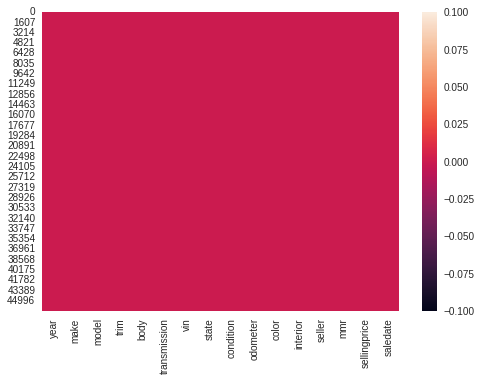

In [ ]:
#number of nulls represented in a heatmap diagram
sns.heatmap(df.isnull())

In [ ]:
#to get unique values
df["transmission"].unique()

array(['automatic', 'manual'], dtype=object)

In [ ]:
#to get unique values
df["body"].unique()

array(['sedan', 'SUV', 'Sedan', 'E-Series Van', 'Crew Cab', 'suv',
       'G Sedan', 'Wagon', 'Regular Cab', 'Double Cab', 'wagon', 'Coupe',
       'Minivan', 'SuperCrew', 'coupe', 'convertible', 'Extended Cab',
       'Hatchback', 'van', 'hatchback', 'Van', 'Convertible', 'SuperCab',
       'g sedan', 'king cab', 'G Convertible', 'King Cab', 'extended cab',
       'quad cab', 'supercab', 'Beetle Convertible', 'minivan', 'G Coupe',
       'Quad Cab', 'crew cab', 'supercrew', 'CrewMax Cab', 'double cab',
       'g coupe', 'Club Cab', 'Access Cab', 'Genesis Coupe',
       'e-series van', 'G37 Convertible', 'Cab Plus 4', 'crewmax cab',
       'genesis coupe', 'promaster cargo van', 'access cab', 'Mega Cab',
       'Koup', 'regular cab', 'mega cab', 'Elantra Coupe',
       'Q60 Convertible', 'regular-cab', 'Promaster Cargo Van', 'Xtracab',
       'CTS Coupe', 'CTS Wagon', 'GranTurismo Convertible',
       'beetle convertible', 'TSX Sport Wagon', 'g convertible',
       'tsx sport wagon', '

In [ ]:
#to get unique values
df["color"].unique()

array(['black', 'gray', 'silver', 'white', 'blue', 'burgundy', 'beige',
       'gold', 'green', 'red', 'purple', '—', 'yellow', 'brown',
       'turquoise', 'orange', 'off-white', 'charcoal', 'pink', 'lime'],
      dtype=object)

In [ ]:
#to get unique values
df["interior"].unique()

array(['gray', '—', 'black', 'beige', 'tan', 'red', 'blue', 'brown',
       'off-white', 'silver', 'orange', 'purple', 'white', 'gold',
       'burgundy', 'green', 'yellow'], dtype=object)

In [ ]:
#to get unique values
df["make"].unique()

array(['Hyundai', 'Toyota', 'Lexus', 'BMW', 'Ford', 'Kia', 'Chevrolet',
       'Cadillac', 'Mercedes-Benz', 'Jeep', 'Infiniti', 'Lincoln',
       'Mazda', 'Chrysler', 'GMC', 'Honda', 'Dodge', 'Audi', 'Nissan',
       'Buick', 'MINI', 'Jaguar', 'Volvo', 'Mitsubishi', 'Volkswagen',
       'Subaru', 'Porsche', 'Isuzu', 'Saturn', 'Pontiac', 'Scion',
       'Acura', 'Ram', 'Land Rover', 'Suzuki', 'Mercury', 'HUMMER',
       'Saab', 'Maserati', 'FIAT', 'Geo', 'smart', 'Oldsmobile', 'Fisker',
       'Bentley', 'Plymouth', 'Ferrari', 'Aston Martin'], dtype=object)

## Data Pre-Processing & Cleaning

_Apply any data preprocessing and/or feature engineering below. Show/output the changes to the dataset._

In [ ]:
#used to delete the '$' sign from the selling price in order to convert the column type into integer 
df['sellingprice'] = df['sellingprice'].str.replace('$','')
df['sellingprice'] = df['sellingprice'].astype('int') 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


In [ ]:
#used to delete the '$' sign from the mmr in order to convert the column type into integer 
df['mmr'] = df['mmr'].str.replace('$','')
df['mmr'] = df['mmr'].astype('int') 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


In [ ]:
#used to delete the 'mi' sign from the odometer in order to convert the column type into float 
df['odometer'] = df['odometer'].str.replace('mi','')
df['odometer'] = df['odometer'].astype('float') 

In [ ]:
df['saledate'][0].split(' ')

['Tue', 'Jun', '02', '2015', '02:30:00', 'GMT-0700', '(PDT)']

In [ ]:
"""We found a correlation between the year and date sold independent variables, 
so we compiled another column called age_sold to combine both independent variables 
in one variable with a high correlation with the selling price"""

year = df['saledate']
year
age = []
for val in year:
  y = val.split(' ')
  #print(y)
  age.append(y[3])
df['age'] = age
df['year'] = df['year'].astype('int') 
df['age'] = df['age'].astype('int')
df['age_sold'] = df['age'] - df['year']

In [ ]:
#we needed to know the count of '_' in order to handle noise data
df["interior"].value_counts()

black        20734
gray         15020
beige         4917
tan           3777
—              988
brown          694
blue           101
red             92
silver          88
off-white       39
purple          31
gold            26
white           23
burgundy        20
green           16
orange          11
yellow           1
Name: interior, dtype: int64

In [ ]:
#we needed to know the count of '_' in order to handle noise data
df["color"].value_counts()

black        9156
white        8693
gray         7046
silver       6982
blue         4244
red          3685
—            2246
gold          948
green         891
burgundy      785
beige         744
brown         529
orange        195
purple        137
off-white     129
yellow         99
charcoal       49
turquoise      15
pink            3
lime            2
Name: color, dtype: int64

In [ ]:
df = df.replace( {"—" : "Unknown"})

In [ ]:
#reduce number of categories in body (step1)
df['body'] = df['body'].str.lower()

In [ ]:
df['body'].unique()

array(['sedan', 'suv', 'e-series van', 'crew cab', 'g sedan', 'wagon',
       'regular cab', 'double cab', 'coupe', 'minivan', 'supercrew',
       'convertible', 'extended cab', 'hatchback', 'van', 'supercab',
       'king cab', 'g convertible', 'quad cab', 'beetle convertible',
       'g coupe', 'crewmax cab', 'club cab', 'access cab',
       'genesis coupe', 'g37 convertible', 'cab plus 4',
       'promaster cargo van', 'mega cab', 'koup', 'elantra coupe',
       'q60 convertible', 'regular-cab', 'xtracab', 'cts coupe',
       'cts wagon', 'granturismo convertible', 'tsx sport wagon',
       'cts-v coupe', 'q60 coupe', 'transit van'], dtype=object)

In [ ]:
#normalize the number of categories to be 8 categories in total to optimize one hot encoding with less compilation time also
body = df['body'].str.contains('sedan')
for i, val in body.items():
  if val == True:
    #print(i, val)
    df.at[i, 'body'] = 'sedan'

body = df['body'].str.contains('cab')
for i, val in body.items():
  if val == True:
    #print(i, val)
    df.at[i, 'body'] = 'pickup truck'

body = df['body'].str.contains('suv')
for i, val in body.items():
  if val == True:
    #print(i, val)
    df.at[i, 'body'] = 'suv'

body = df['body'].str.contains('van')
for i, val in body.items():
  if val == True:
    #print(i, val)
    df.at[i, 'body'] = 'minivan'

body = df['body'].str.contains('wagon')
for i, val in body.items():
  if val == True:
    #print(i, val)
    df.at[i, 'body'] = 'wagon'

body = df['body'].str.contains('coupe')
for i, val in body.items():
  if val == True:
    #print(i, val)
    df.at[i, 'body'] = 'coupe'

body = df['body'].str.contains('convertible')
for i, val in body.items():
  if val == True:
    #print(i, val)
    df.at[i, 'body'] = 'convertible'

body = df['body'].str.contains('koup')
for i, val in body.items():
  if val == True:
    #print(i, val)
    df.at[i, 'body'] = 'coupe'

body = df['body'].str.contains('supercrew')
for i, val in body.items():
  if val == True:
    #print(i, val)
    df.at[i, 'body'] = 'pickup truck'



In [ ]:
df['body'].unique()

array(['sedan', 'suv', 'minivan', 'pickup truck', 'wagon', 'coupe',
       'convertible', 'hatchback'], dtype=object)

In [ ]:
df

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate,age,age_sold
0,2013,Hyundai,Sonata,GLS,sedan,automatic,5npeb4acxdh702805,ma,3.9,50404.0,black,gray,the hertz corporation,11000,10900,Tue Jun 02 2015 02:30:00 GMT-0700 (PDT),2015,2
1,2014,Toyota,4Runner,SR5,suv,automatic,jtezu5jr2e5064567,fl,4.9,17846.0,gray,Unknown,award auto sales and leasing inc,28700,29900,Wed Feb 18 2015 07:15:00 GMT-0800 (PST),2015,1
2,2012,Lexus,IS 250,Base,sedan,automatic,jthbf5c24c5168599,fl,4.1,21122.0,silver,black,lexus financial services,22200,24200,Tue Jan 20 2015 01:30:00 GMT-0800 (PST),2015,3
3,2002,BMW,X5,4.4i,suv,automatic,5uxfb33562lh33864,fl,1.9,145303.0,black,black,peddle llc,3675,3200,Wed Mar 04 2015 07:10:00 GMT-0800 (PST),2015,13
4,2014,Ford,E-Series Van,E-250,minivan,automatic,1ftne2ew0eda31832,wa,4.9,6714.0,white,gray,u-haul,22500,22100,Wed Feb 18 2015 06:45:00 GMT-0800 (PST),2015,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46573,2013,Ford,Edge,SE,suv,automatic,2fmdk4gc2dbc03247,va,3.5,52844.0,Unknown,gray,wheels exchange llc,15650,17000,Wed Jan 07 2015 09:30:00 GMT-0800 (PST),2015,2
46574,2012,Infiniti,G Sedan,G37 Journey,sedan,automatic,jn1cv6ap9cm623162,ca,4.5,23185.0,black,black,nissan infiniti lt,19350,21500,Thu Jun 18 2015 05:30:00 GMT-0700 (PDT),2015,3
46575,2013,BMW,3 Series,328i,sedan,automatic,wba3a5c56df356614,tx,4.2,45357.0,white,beige,motorcars of south texas,22200,22000,Wed Feb 18 2015 02:00:00 GMT-0800 (PST),2015,2
46576,2013,Toyota,Camry,LE,sedan,automatic,4t1bf1fk8du254684,ca,3.5,43376.0,black,beige,avis rac/san leandro,13400,13800,Wed Jan 14 2015 04:30:00 GMT-0800 (PST),2015,2


## Exploratory Data Analysis


**Q0 (example): What is the most popular car exterior color?**


In [ ]:
df["color"].value_counts()

black        9156
white        8693
gray         7046
silver       6982
blue         4244
red          3685
Unknown      2246
gold          948
green         891
burgundy      785
beige         744
brown         529
orange        195
purple        137
off-white     129
yellow         99
charcoal       49
turquoise      15
pink            3
lime            2
Name: color, dtype: int64

**Visualization**

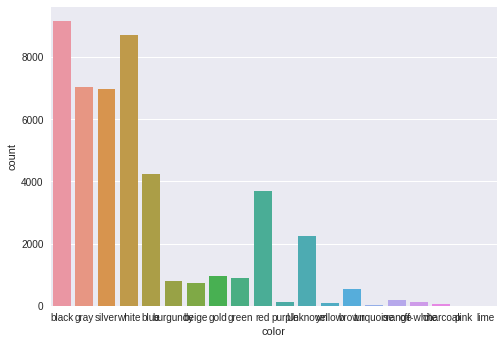

In [ ]:
# Basic, minimal plot example
sns.countplot(x='color', data=df)

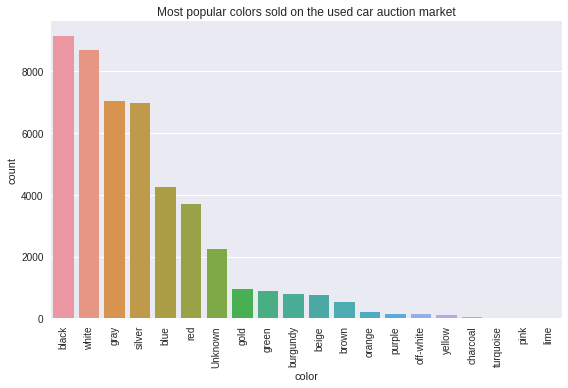

In [ ]:
# Much better plot, with sorting in descending order, rotated x-axis labels for clarity, and a plot title
# Your visualizations should be neatly presented like the example below.
large_to_small = df.groupby('color').size().sort_values(ascending=False)
sns.countplot(x='color', data=df, order=large_to_small.index).set(title='Most popular colors sold on the used car auction market')
plt.xticks(rotation=90)
plt.tight_layout()

**Example note:** _you need to answer using a visualization (above) and a written/text answer (below)._

**Answer for Q0**: Black is the most popular exterior color of used cars sold in auctions, followed very closely by white.

**Q1: What are the most popular car brands? (mention at least 3)**


**Visualization**

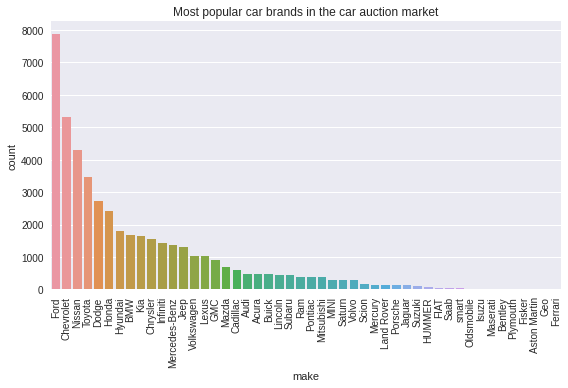

In [ ]:
large_to_small = df.groupby('make').size().sort_values(ascending=False)
sns.countplot(x='make', data=df, order=large_to_small.index).set(title='Most popular car brands in the car auction market')
plt.xticks(rotation=90)
plt.tight_layout()

**Answer for Q1**: The most popular Car Brands in descending order: 

1.   Ford 
2.   Chevrolet 
3.   Nissan





**Q2: Do automatic cars, on average, sell for a higher price than manual cars?**


**Visualization**

In [ ]:
g = pd.DataFrame(df['transmission'])
g['sellingprice'] = df['sellingprice']
g.groupby('transmission', as_index=False)['sellingprice'].mean()

,transmission,sellingprice
0,automatic,13761.075476
1,manual,11181.775758


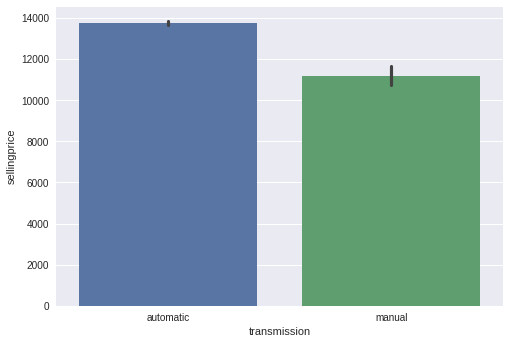

In [ ]:
sns.barplot(x='transmission', y='sellingprice',data=df)


**Answer for Q2**: Yes, according to the Graph and Plots Automatic cars sell at a higher price in average in comparison to manual cars 

**Q3: Draw a box plot showing the distribution of the selling prices of each car make. Which car makes have the widest distribution of selling price (name two)? Which are the most expensive (name two)?**


**Visualization**

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


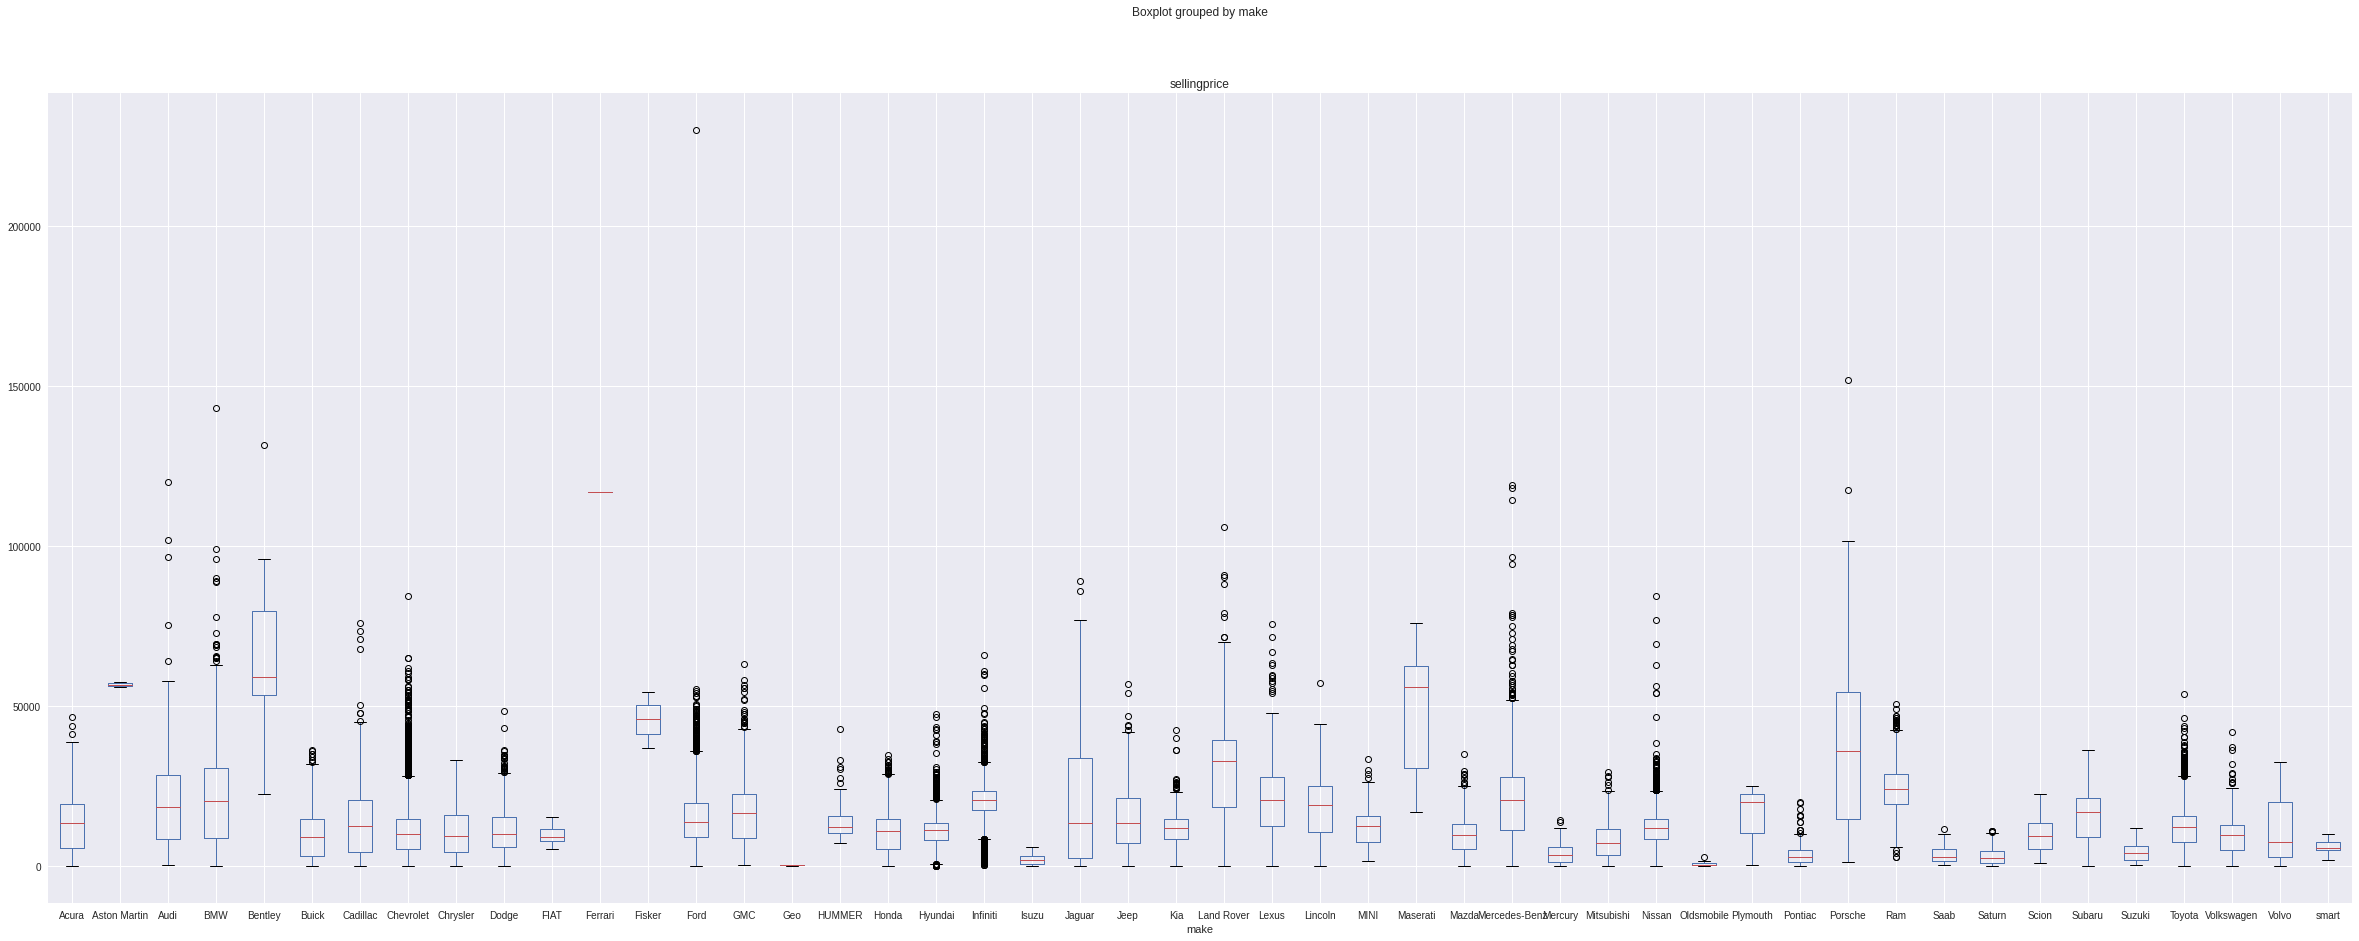

In [ ]:
from matplotlib import pyplot
fig, ax= pyplot.subplots(figsize=(40,15))
df.boxplot(ax=ax,by='make',column=['sellingprice'])


**Answer for Q3**: 

The Car Make with the widest distribution: 


1.   Porsche
2.   Jaguar 

The Car Make with the highest selling price: 


1.   Porsche 
2.   Bentley 


**Q4: How correlated is the odometer reading or mileage with the car's sale price? (Hint: plot a line of best fit.)**

**Visualization**

In [ ]:
corr = df.corr()
corr

,year,condition,odometer,mmr,sellingprice,age,age_sold
year,1.000000,0.549158,-0.777219,0.592904,0.581164,0.043312,-0.997502
condition,0.549158,1.000000,-0.540371,0.476200,0.529141,0.037107,-0.546844
odometer,-0.777219,-0.540371,1.000000,-0.587920,-0.580900,-0.022761,0.776049
mmr,0.592904,0.476200,-0.587920,1.000000,0.979783,0.029281,-0.591169
sellingprice,0.581164,0.529141,-0.580900,0.979783,1.000000,0.031785,-0.579245
age,0.043312,0.037107,-0.022761,0.029281,0.031785,1.000000,0.027364
age_sold,-0.997502,-0.546844,0.776049,-0.591169,-0.579245,0.027364,1.000000


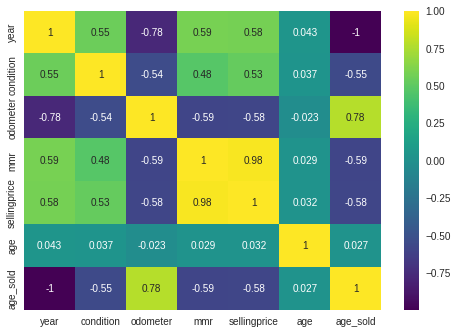

In [ ]:
sns.heatmap(corr, cmap='viridis', annot = True);


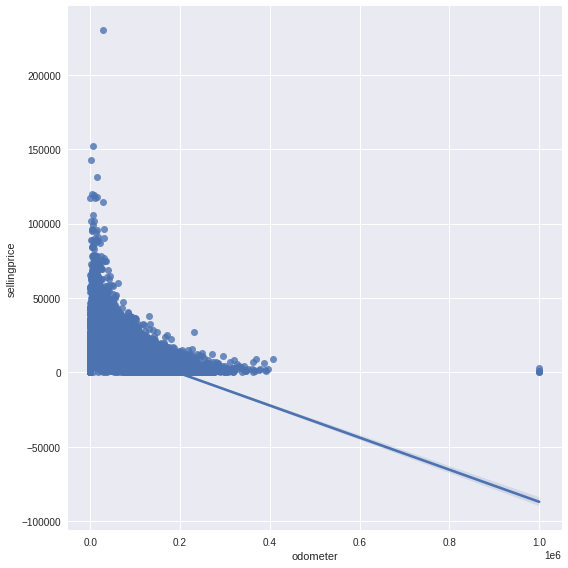

In [ ]:
sns.lmplot(x='odometer', y='sellingprice', data=df, palette='magma', height=8);

**Answer for Q4**: There is a negative correlation between odometer and selling price


**Q5: Likewise, how correlated is the car's condition with its sale price? (Hint: plot a line of best fit.)**

**Visualization**

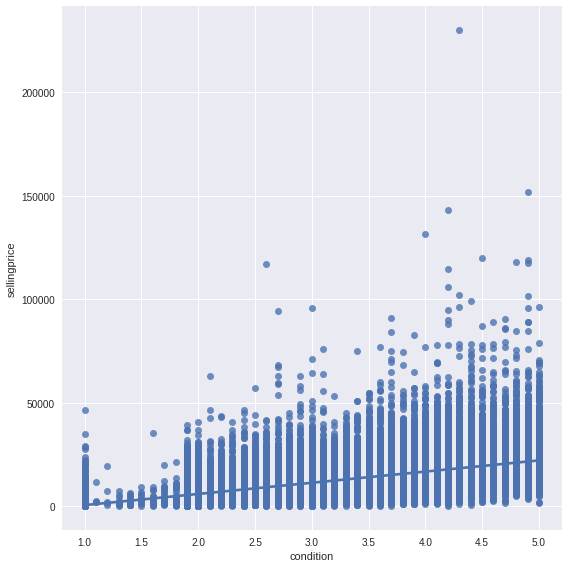

In [ ]:
sns.lmplot(x='condition', y='sellingprice', data=df, palette='magma', height=8);

**Answer for Q5**: There is a positive correlation between condition and selling price

**Q6: Are there differences in the average car price due to the car's body type? If so, rank their order and state the most expensive and least expensive car body type.**

**Visualization**

In [ ]:
g = pd.DataFrame(df['body'])
g['sellingprice'] = df['sellingprice']
g.groupby('body', as_index=False)['sellingprice'].mean()

,body,sellingprice
0,convertible,17581.563278
1,coupe,16538.921097
2,hatchback,10320.636123
3,minivan,11981.053571
4,pickup truck,17981.766407
5,sedan,11861.795912
6,suv,16221.941270
7,wagon,9872.678720


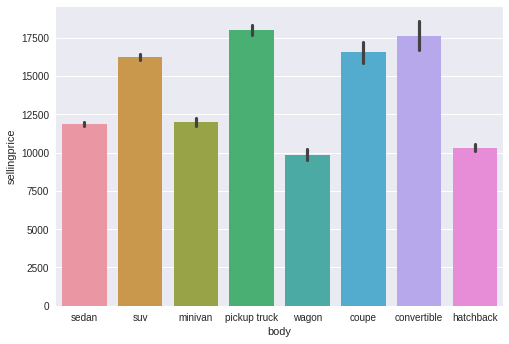

In [ ]:
#fig, ax= pyplot.subplots(figsize=(10,20))
sns.barplot(x='body',y='sellingprice', data=df)

**Answer for Q6**: Yes, 



1.   Pickup Truck 
2.   Covnertible 
3. Coupe 
4. SUV 
5. Minivan 
6. Sedan 
7. Hatchback
8. Wagon 





## Data Preparation for Modelling

_Apply any additional data preparation steps needed before modelling below. Show/output the changes to the dataset._

In [ ]:
corr = df.corr()
corr

,year,condition,odometer,mmr,sellingprice,age,age_sold
year,1.000000,0.549158,-0.777219,0.592904,0.581164,0.043312,-0.997502
condition,0.549158,1.000000,-0.540371,0.476200,0.529141,0.037107,-0.546844
odometer,-0.777219,-0.540371,1.000000,-0.587920,-0.580900,-0.022761,0.776049
mmr,0.592904,0.476200,-0.587920,1.000000,0.979783,0.029281,-0.591169
sellingprice,0.581164,0.529141,-0.580900,0.979783,1.000000,0.031785,-0.579245
age,0.043312,0.037107,-0.022761,0.029281,0.031785,1.000000,0.027364
age_sold,-0.997502,-0.546844,0.776049,-0.591169,-0.579245,0.027364,1.000000


In [ ]:
#convert non numeric columns into numeric to check correlation of objects
labeleddf = df.copy()
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for x in labeleddf:
    if labeleddf[x].dtypes=='object':
        labeleddf[x] = le.fit_transform(labeleddf[x])

In [ ]:
corr = labeleddf.corr()
corr

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate,age,age_sold
year,1.000000,-0.006189,-0.045292,0.088170,0.013833,-0.089053,-0.026549,-0.002970,0.549158,-0.777219,0.000426,-0.191070,-0.001333,0.592904,0.581164,0.038088,0.043312,-0.997502
make,-0.006189,1.000000,0.046749,-0.085863,0.031604,0.045072,0.350123,-0.033401,-0.014931,-0.030084,-0.008882,0.001877,0.167737,-0.058722,-0.055571,0.045811,-0.003702,0.005931
model,-0.045292,0.046749,1.000000,0.109227,0.056006,0.012453,0.095561,0.018817,-0.014478,0.061077,0.011188,0.030701,0.033490,-0.005513,-0.005710,0.010144,0.007218,0.045828
trim,0.088170,-0.085863,0.109227,1.000000,0.026040,0.002159,-0.281587,0.062692,0.058976,-0.029962,0.013099,0.016966,-0.040849,0.032709,0.031676,-0.010356,0.014486,-0.087196
body,0.013833,0.031604,0.056006,0.026040,1.000000,-0.158258,-0.052435,0.029029,0.025171,0.042088,-0.033078,0.037223,0.022497,-0.007478,-0.007960,0.020377,-0.000895,-0.013904
transmission,-0.089053,0.045072,0.012453,0.002159,-0.158258,1.000000,0.048312,0.016968,-0.032498,0.033408,-0.011277,-0.031902,-0.002113,-0.045022,-0.049499,-0.029097,0.001454,0.089206
vin,-0.026549,0.350123,0.095561,-0.281587,-0.052435,0.048312,1.000000,-0.094952,0.029513,-0.047540,-0.037968,-0.034374,0.090744,0.110807,0.110281,0.017916,-0.008665,0.025951
state,-0.002970,-0.033401,0.018817,0.062692,0.029029,0.016968,-0.094952,1.000000,0.001693,0.021000,-0.028780,0.053968,0.009767,-0.029737,-0.032773,0.140075,0.028397,0.004979
condition,0.549158,-0.014931,-0.014478,0.058976,0.025171,-0.032498,0.029513,0.001693,1.000000,-0.540371,0.013068,-0.105672,-0.024697,0.476200,0.529141,-0.007014,0.037107,-0.546844
odometer,-0.777219,-0.030084,0.061077,-0.029962,0.042088,0.033408,-0.047540,0.021000,-0.540371,1.000000,0.026899,0.170697,0.006421,-0.587920,-0.580900,-0.018127,-0.022761,0.776049


In [ ]:
# we made label encoding in order to determine the correlations between the independent categorical columns in order to know which columns we needed to delete
#del df['model']
del df['trim']
del df['state']
#del df['color']
del df['seller']
del df['saledate']
del df['age']
#del df['year']
del df['vin']
del df['mmr']
del df['age_sold']
del df['body']
df 


,year,make,model,transmission,condition,odometer,color,interior,sellingprice
0,2013,Hyundai,Sonata,automatic,3.9,50404.0,black,gray,10900
1,2014,Toyota,4Runner,automatic,4.9,17846.0,gray,Unknown,29900
2,2012,Lexus,IS 250,automatic,4.1,21122.0,silver,black,24200
3,2002,BMW,X5,automatic,1.9,145303.0,black,black,3200
4,2014,Ford,E-Series Van,automatic,4.9,6714.0,white,gray,22100
...,...,...,...,...,...,...,...,...,...
46573,2013,Ford,Edge,automatic,3.5,52844.0,Unknown,gray,17000
46574,2012,Infiniti,G Sedan,automatic,4.5,23185.0,black,black,21500
46575,2013,BMW,3 Series,automatic,4.2,45357.0,white,beige,22000
46576,2013,Toyota,Camry,automatic,3.5,43376.0,black,beige,13800


In [ ]:
#normalization
numerical_columns = [ 'year','condition', 'odometer']


df[numerical_columns] = ( 
    
    df[numerical_columns] - df[numerical_columns].min()  
    
) /( 
    
    df[numerical_columns].max() - df[numerical_columns].min()
)
df.head()

,year,make,model,transmission,condition,odometer,color,interior,sellingprice
0,0.92,Hyundai,Sonata,automatic,0.725,0.050403,black,gray,10900
1,0.96,Toyota,4Runner,automatic,0.975,0.017845,gray,Unknown,29900
2,0.88,Lexus,IS 250,automatic,0.775,0.021121,silver,black,24200
3,0.48,BMW,X5,automatic,0.225,0.145302,black,black,3200
4,0.96,Ford,E-Series Van,automatic,0.975,0.006713,white,gray,22100


In [ ]:
categorical_columns = ['make', 'model', 'transmission','interior','color']
df_encode = pd.get_dummies(data=df,
                           columns=categorical_columns,
                           drop_first=True,
                           dtype='int8')


In [ ]:
df_encode

,year,condition,odometer,sellingprice,make_Aston Martin,make_Audi,make_BMW,make_Bentley,make_Buick,make_Cadillac,...,color_lime,color_off-white,color_orange,color_pink,color_purple,color_red,color_silver,color_turquoise,color_white,color_yellow
0,0.92,0.725,0.050403,10900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.96,0.975,0.017845,29900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.88,0.775,0.021121,24200,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0.48,0.225,0.145302,3200,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.96,0.975,0.006713,22100,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46573,0.92,0.625,0.052843,17000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
46574,0.88,0.875,0.023184,21500,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
46575,0.92,0.800,0.045356,22000,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
46576,0.92,0.625,0.043375,13800,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Modelling

_Apply the linear regression model below._

In [ ]:
from sklearn.model_selection import train_test_split

x = df_encode.drop('sellingprice',axis=1)
y = df_encode['sellingprice'] # Dependent variable

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=23)

print('Training dataset size:', x_train.shape[0])
print('Testing dataset size:', x_test.shape[0])

Training dataset size: 37262
Testing dataset size: 9316


In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

lin_reg.fit(x_train, y_train);

## Model Evaluation

_Evaluate the model you applied._

In [ ]:
# sklearn regression module
y_pred = lin_reg.predict(x_test)

# Evaluation
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(y_pred, y_test, squared=False)

# R_square
R_square = lin_reg.score(x_test,y_test)
print('The root mean square error (RMSE) is: ', rmse)
print('R^2 obtained is:', R_square)

The root mean square error (RMSE) is:  3960.4122862605273
R^2 obtained is: 0.8302309457507628


## Model Validation (Optional)

_Check if the model you applied meets the necessary assumptions for the chosen model._

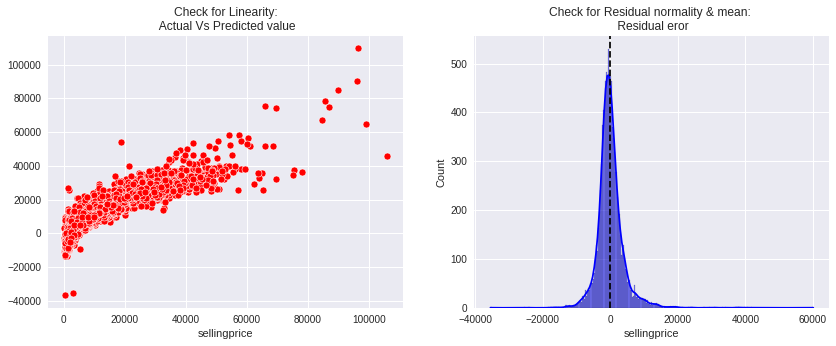

In [ ]:
# Checking for linearity
f = plt.figure(figsize=(14,5))
ax = f.add_subplot(121)
sns.scatterplot(x=y_test, y=y_pred, ax=ax, color='r')
ax.set_title('Check for Linearity:\n Actual Vs Predicted value')

# Checking for residual normality & mean
ax = f.add_subplot(122)
sns.histplot(x=(y_test - y_pred), ax=ax, color='b', kde=True)
ax.axvline((y_test - y_pred).mean(), color='k', linestyle='--')
ax.set_title('Check for Residual normality & mean: \n Residual eror');

In [ ]:
import statsmodels.api as sm

# Fit and make the predictions by the model
model = sm.OLS(y_train, x_train).fit()
predictions = model.predict(x_test)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           sellingprice   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     253.0
Date:                Sun, 06 Nov 2022   Prob (F-statistic):               0.00
Time:                        14:50:38   Log-Likelihood:            -3.6226e+05
No. Observations:               37262   AIC:                         7.259e+05
Df Residuals:                   36581   BIC:                         7.317e+05
Df Model:                         680                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
year                            2.605e+04    270.605     96.248      0.000    2.55e+04    2.66e+04
condition                       5749.1318    114.334     50.284      0.000    5525.034    5973.229
odometer                        -4.47e+04    715.333    -62.494      0.000   -4.61e+04   -4.33e+04
make_Aston Martin               1.766e+04   2039.592      8.658      0.000    1.37e+04    2.17e+04
make_Audi                       9839.4603    572.779     17.178      0.000    8716.797     1.1e+04
make_BMW                       -4527.6397    883.910     -5.122      0.000   -6260.128   -2795.151
make_Bentley                     4.09e+04   1370.312     29.846      0.000    3.82e+04    4.36e+04
make_Buick                     -7037.5591    415.992    -16.918      0.000   -7852.915   -6222.203
make_Cadillac                  -1313.8743    520.336     -2.525      0.012   -2333.748    -294.001
make_Chevrolet                 -2450.6576    966.586     -2.535      0.011   -4345.193    -556.122
make_Chrysler                  -5510.0177    597.988     -9.214      0.000   -6682.092   -4337.943
make_Dodge                     -3063.6947    590.309     -5.190      0.000   -4220.717   -1906.672
make_FIAT                      -1.117e+04    534.466    -20.905      0.000   -1.22e+04   -1.01e+04
make_Ferrari                    4.842e+04   2041.331     23.718      0.000    4.44e+04    5.24e+04
make_Fisker                     8506.1717   1448.727      5.871      0.000    5666.625    1.13e+04
make_Ford                      -4972.3708    383.936    -12.951      0.000   -5724.896   -4219.845
make_GMC                       -6006.0419   2049.943     -2.930      0.003      -1e+04   -1988.094
make_Geo                        1.084e+04   5738.047      1.890      0.059    -402.749    2.21e+04
make_HUMMER                      945.5410    993.400      0.952      0.341   -1001.551    2892.633
make_Honda                     -5940.0196    526.336    -11.286      0.000   -6971.654   -4908.386
make_Hyundai                   -8891.3556    426.535    -20.846      0.000   -9727.376   -8055.335
make_Infiniti                  -3131.0067   4208.732     -0.744      0.457   -1.14e+04    5118.229
make_Isuzu                     -5028.2506   1167.618     -4.306      0.000   -7316.816   -2739.685
make_Jaguar                     6684.0449    493.786     13.536      0.000    5716.211    7651.879
make_Jeep                      -6237.3933    307.822    -20.263      0.000   -6840.733   -5634.053
make_Kia                       -8159.4737    478.936    -17.037      0.000   -9098.203   -7220.745
make_Land Rover                 3645.5706    635.941      5.733      0.000    2399.107    4892.034
make_Lexus                      2648.7981    416.152      6.365      0.000    1833.128    3464.468
make_Lincoln  

## Conclusion and Recommendations

Comment on the model accuracy and your findings from model evaluation and validation. State the problems (if any) and suggest possible solutions. Would you recommend this model for a used cars dealership that wants to get reliable estimates for used car prices?

**Answer**: 
The root mean square error (RMSE) is:  3960.4122862605273
R^2 obtained is: 0.8302309457507628
The linear regression model's score is 0.83. What is considered a good 
 value depends on the domain context and use-case. In general, the larger the R-squared value, the more precisely the predictor variables are able to predict the value of the response variable. 

That said, 0.83 is an acceptable baseline to achieve without any data transformation or outlier handling. It is important to note that linear regression is sensitive to outliers, and their presence may significantly worsen the model's performance.

The root mean squared error is around 3960. This tells us that the average deviation between the actual selling price of the sale of the used car and the predicted sale price of the used car is 3960 dollars.

We believe that this model will allow dealers to operate and sell their cars without any notible losses due to a highly accurate model while factoring in the outliers are present in the model. 
